In [1]:
%load_ext autoreload
%autoreload 2
import sklearn
from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

from convexlocalisometry.transformation import exponential_transformation
from convexlocalisometry.loss import isometry_loss
from convexlocalisometry.algorithm import greedy, brute, group_basis_pursuit, group_lasso

In [2]:
wine = load_wine()
print(wine.keys())
P_wine, D_wine = wine['data'].shape
print("D_wine", D_wine)
print("P_wine", P_wine)
print(wine['feature_names'])
wine_df = pd.DataFrame(data= wine['data'], columns = wine['feature_names']) # label with class names?
scaler = StandardScaler()
wine_standardized = pd.DataFrame(data = scaler.fit_transform(wine['data']), columns = wine['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
D_wine 13
P_wine 178
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
iris = load_iris()
print(iris.keys())
P_iris, D_iris = iris['data'].shape

print("D_iris", D_iris)
print("P_iris", P_iris)
print(wine['feature_names'])
iris_df = pd.DataFrame(data= iris['data'], columns = iris['feature_names'])

scaler = StandardScaler()
iris_standardized = pd.DataFrame(data = scaler.fit_transform(iris['data']), columns = iris['feature_names'])


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
D_iris 4
P_iris 150
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
from tqdm import tqdm

In [16]:
losses = []
two_stage_losses = []
random_two_stage_losses= []
for i in range(25):
    X = iris_standardized.sample(frac = .5).to_numpy().transpose()
    output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
#     two_stage_output = basis_pursuit_indices[np.asarray(greedy(X[:,basis_pursuit_indices], isometry_loss, D_wine, []))] # plainly this is too hard 178**13 combinations
    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 12124.60it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 14031.80it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 16416.98it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 16419.73it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 18591.77it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 24322.86it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 17811.29it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 16451.02it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 16840.09it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 24552.71it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 18199.18it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 22537.90it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 17113.62it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 21754.69it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


0it [00:00, ?it/s]/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
35it [00:00, 14557.78it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 17589.34it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 19508.39it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 18769.26it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 25698.14it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 19088.16it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 20679.06it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 18934.69it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 24004.68it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 19000.86it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 14678.60it/s]


In [22]:
len(np.where(np.asarray(losses ) > np.asarray(two_stage_losses))[0])

23

In [40]:
losses = []
two_stage_losses = []
random_two_stage_losses= []
for i in range(1):
    X = wine_standardized.sample(frac = .5).to_numpy().transpose()
    output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

Computing brute force solution for dictionary dimension 25 and target_dimension 4


12650it [00:00, 24001.06it/s]


In [41]:
losses

[9.928997253235055]

In [42]:
two_stage_losses

[9.928997253235059]

In [50]:
wine_standardized

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [72]:
losses = []
two_stage_losses = []
random_two_stage_losses= []
dimension = 5
for i in range(25):
    X = wine_standardized.sample(frac = .5).to_numpy().transpose()[:dimension,:]
    output = greedy(X, isometry_loss, dimension, []) # plainly brute is too hard 178**13 combinations
#     output = brute(X, isometry_loss, dimension)
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, dimension))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 14 and target_dimension 5


2002it [00:00, 25692.32it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 23124.28it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 25972.11it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 23692.75it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 25845.04it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 22872.35it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 26960.76it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 23708.33it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 25292.29it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 5


126it [00:00, 26571.59it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 5


2002it [00:00, 25492.88it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 28139.47it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 25162.83it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 25298.34it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 25887.54it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 24109.99it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 25255.94it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 26719.01it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 27296.17it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 24871.14it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 24292.86it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 23415.25it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 27035.14it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 5


2002it [00:00, 28735.48it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 26762.23it/s]


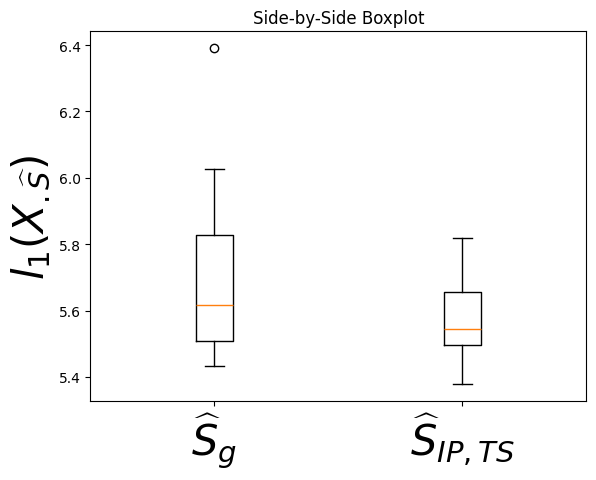

In [86]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')